In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
home_data = pd.read_csv('/content/drive/MyDrive/machine_learning/archive/housing.csv', usecols = ['longitude', 'latitude','median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

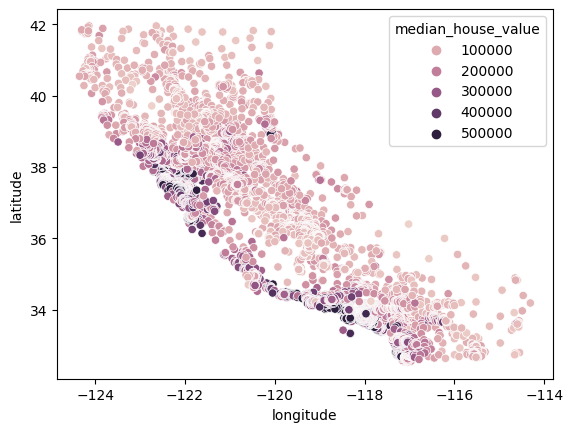

In [18]:
import seaborn as sns
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue ='median_house_value')

In [31]:
X=home_data.drop(columns=['median_house_value'],axis=1)
Y=home_data['median_house_value']


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [33]:
from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

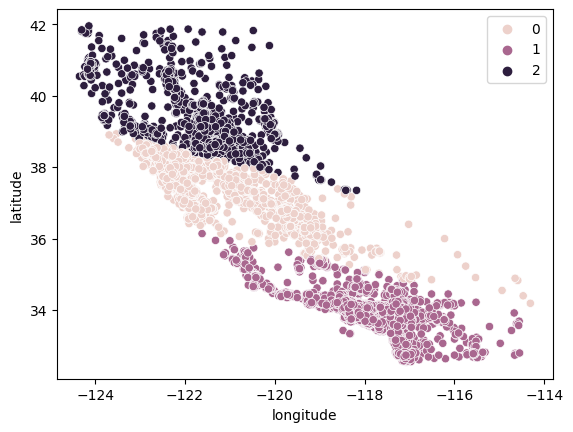

In [34]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

In [36]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

KeyError: ignored

In [37]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')
K = range(2, 8)
fits = []
score = []

<Axes: xlabel='longitude', ylabel='latitude'>

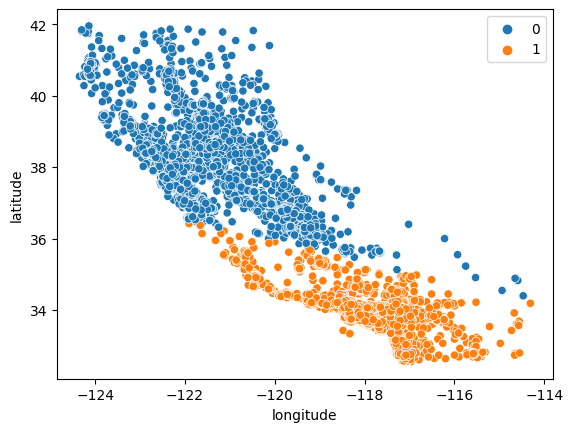

In [38]:
for k in K:
  model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
  fits.append(model)
  score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

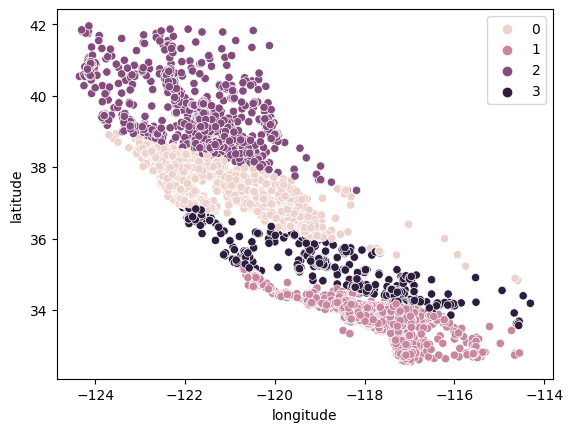

In [39]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

<Axes: >

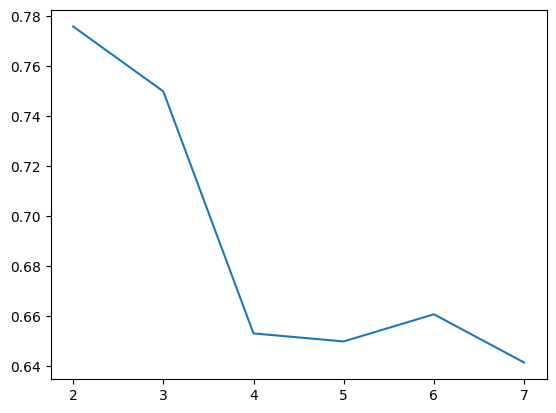

In [40]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='longitude', ylabel='latitude'>

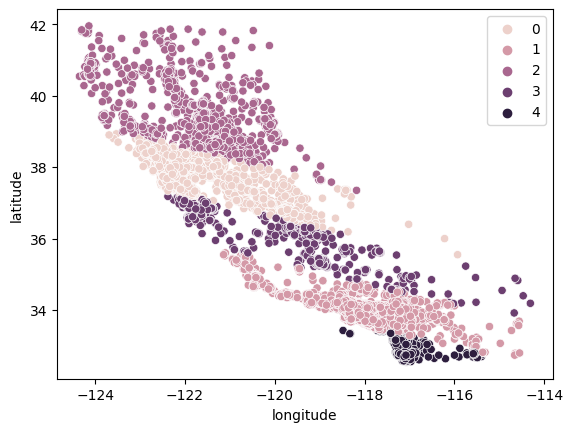

In [41]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)